# Arbre de décision et Forêt aléatoire
## Partie 1 – Chargement & Exploration
1. Chargez le jeu de données Titanic. A chez les 5 premières lignes et les types de données. Que
remarquez-vous ?

In [59]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv("titanic/train.csv")

In [61]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Combien y a-t-il de passagers au total ? Combien de survivants ? Calculez les proportions.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df.shape[0]

891

In [100]:
# Survivant
survivant = df[df['Survived'] == 1]
mort = df[df['Survived'] == 0]
print("Survivant: ", survivant.shape[0], "Pourcentage: ", (survivant.shape[0] / df.shape[0]) * 100)

Survivant:  342 Pourcentage:  38.38383838383838


3. Identiez les colonnes avec des valeurs manquantes. Pour chaque colonne concernée, indiquez le
nombre et le pourcentage de valeurs manquantes.

In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Partie 2 – Nettoyage & Préparation
4. Imputez les valeurs manquantes : Age par la médiane, Embarked par la modalité la plus fréquente.

In [67]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


6. Créez une nouvelle variable Title à partir de Name. Est-ce une variable informative ? Visualisez sa distribution.

In [69]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [70]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


5. Supprimez les colonnes inutiles : PassengerId, Name, Ticket, Cabin. Justiez ce choix.

In [71]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(columns_to_drop, axis=1)

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,28.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [73]:
df['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [74]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

## Partie 3 – Encodage & Prétraitement
7. Encodez les variables catégorielles (Sex, Embarked, Title) à l’aide de LabelEncoder ou
OneHotEncoder. Testez les deux méthodes.


In [99]:
def label_encoding(dataframe, column):
    # LabelEncoder
    from sklearn.preprocessing import LabelEncoder
    value = list(dataframe[column].unique())
    label = LabelEncoder()
    label.fit(value)
    dataframe[f"{column}_LabelEncoder"] = label.fit_transform(dataframe[column])
    return dataframe

def one_hot_encoding(dataframe, column):
    # OneHotEncoder
    from sklearn.preprocessing import OneHotEncoder
    one_hot = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    one_hot_value = one_hot.fit_transform(dataframe[column].to_frame())
    one_hot_data = pd.DataFrame(one_hot_value, columns=one_hot.get_feature_names_out([column]))
    return pd.concat([dataframe.drop(column, axis = 1), one_hot_data], axis=1)

def encode(dataframe, columns):
    for column in columns:
        dataframe = label_encoding(dataframe, column)
        dataframe = one_hot_encoding(dataframe, column)
    return dataframe

In [101]:
df_encoded = encode(df, ['Title', 'Embarked', 'Sex'])

In [103]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_LabelEncoder,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_LabelEncoder,Embarked_Q,Embarked_S,Sex_LabelEncoder,Sex_male
0,0,3,22.0,1,0,7.2500,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
1,1,1,38.0,1,0,71.2833,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,1,3,26.0,0,0,7.9250,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
3,1,1,35.0,1,0,53.1000,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
4,0,3,35.0,0,0,8.0500,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,14,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,1,1.0
887,1,1,19.0,0,0,30.0000,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
888,0,3,28.0,1,2,23.4500,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
889,1,1,26.0,0,0,30.0000,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1.0


8. Standardisez Age et Fare avec StandardScaler. Pourquoi cette étape peut-elle être utile même avec des arbres ?

In [105]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
# Age
df_encoded['Age'] = standard_scaler.fit_transform(df_encoded['Age'].to_frame())
# Fare
df_encoded['Fare'] = standard_scaler.fit_transform(df_encoded['Fare'].to_frame())
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_LabelEncoder,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_LabelEncoder,Embarked_Q,Embarked_S,Sex_LabelEncoder,Sex_male
0,0,3,-0.565736,1,0,-0.502445,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
1,1,1,0.663861,1,0,0.786845,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,1,3,-0.258337,0,0,-0.488854,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
3,1,1,0.433312,1,0,0.420730,12,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
4,0,3,0.433312,0,0,-0.486337,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,14,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,1,1.0
887,1,1,-0.796286,0,0,-0.044381,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
888,0,3,-0.104637,1,2,-0.176263,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0,0.0
889,1,1,-0.258337,0,0,-0.044381,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,1.0


9. Divisez le dataset en X et y. Cible = Survived. Faites un train_test_split (70/30) avec random_state=42.

In [106]:
from sklearn.model_selection import train_test_split
y = df_encoded['Survived']
x_train, x_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.42, random_state=42)

## Partie 4 – Visualisation & Analyse Exploratoire
10. Affichez la heatmap des corrélations. Quelles sont les variables les plus corrélées avec Survived ?


In [122]:
correlation = df_encoded.corr()
correlation_y = correlation["Survived"].abs().sort_values()
strong_corr = correlation_y[(correlation_y > 0.2) & (correlation_y < 0.98)]
strong_corr = df_encoded[strong_corr.index].corr()
features = strong_corr.index
df_encoded[features].corr()

,Fare,Title_Miss,Pclass,Title_Mrs,Sex_male,Sex_LabelEncoder,Title_Mr
Fare,1.000000,0.118271,-0.549500,0.105203,-0.182333,-0.182333,-0.183766
Title_Miss,0.118271,1.000000,-0.000576,-0.204670,-0.686808,-0.686808,-0.595692
Pclass,-0.549500,-0.000576,1.000000,-0.149209,0.131900,0.131900,0.142698
Title_Mrs,0.105203,-0.204670,-0.149209,1.000000,-0.547600,-0.547600,-0.474952
Sex_male,-0.182333,-0.686808,0.131900,-0.547600,1.000000,1.000000,0.867334
Sex_LabelEncoder,-0.182333,-0.686808,0.131900,-0.547600,1.000000,1.000000,0.867334
Title_Mr,-0.183766,-0.595692,0.142698,-0.474952,0.867334,0.867334,1.000000


<Axes: >

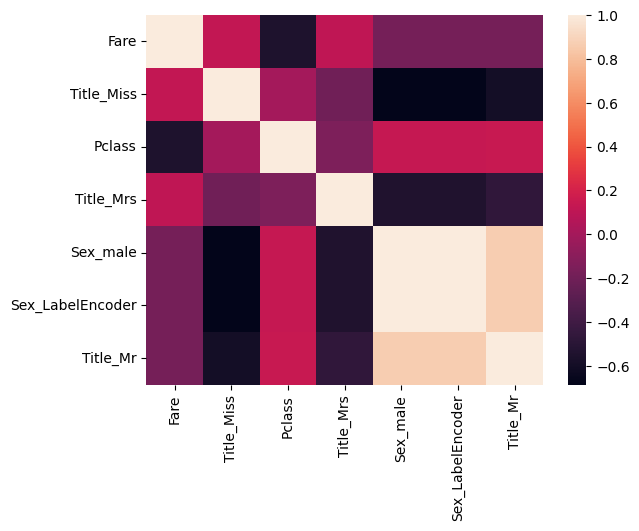

In [123]:
import seaborn as sns
sns.heatmap(df_encoded[features].corr())